<a href="https://colab.research.google.com/github/kushu9999/Stock_Price_Prediction-Facebook/blob/master/Facebook_Stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import quandl 

In [0]:
# Get the stock data
quandl.ApiConfig.api_key = "9hhTSLL8bY4xsx######" # Put your api here i hide because security purposes
dataset = quandl.get("WIKI/FB")
# View Top 5 data
dataset.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2012-05-18,42.05,45.00,38.00,38.2318,573576400.0,0.0,1.0,42.05,45.00,38.00,38.2318,573576400.0
2012-05-21,36.53,36.66,33.00,34.0300,168192700.0,0.0,1.0,36.53,36.66,33.00,34.0300,168192700.0
2012-05-22,32.61,33.59,30.94,31.0000,101786600.0,0.0,1.0,32.61,33.59,30.94,31.0000,101786600.0
2012-05-23,31.37,32.50,31.36,32.0000,73600000.0,0.0,1.0,31.37,32.50,31.36,32.0000,73600000.0
2012-05-24,32.95,33.21,31.77,33.0300,50237200.0,0.0,1.0,32.95,33.21,31.77,33.0300,50237200.0


In [0]:
dataset.shape

(1472, 12)

# Feature Engineering

In [0]:
# In this dataset our independent variable is Adj. Close and We Want to predict next days Adj. Close
# So we only take Adj.close Column and all other we don't want
dataset = dataset[['Adj. Close']]

In [0]:
dataset

,Adj. Close
Date,
2012-05-18,38.2318
2012-05-21,34.0300
2012-05-22,31.0000
2012-05-23,32.0000
2012-05-24,33.0300
...,...
2018-03-21,169.3900
2018-03-22,164.8900
2018-03-23,159.3900


In [0]:
''' First we will create  a variable for predicting 'n' days out into future'''
forecast_out = 30 # No of days of future prediction
# Creating another column of target variable shifted 'n' units up
dataset['prediction'] = dataset[['Adj. Close']].shift(-forecast_out)

In [0]:
dataset.head()

,Adj. Close,prediction
Date,,
2012-05-18,38.2318,30.771
2012-05-21,34.0300,31.200
2012-05-22,31.0000,31.470
2012-05-23,32.0000,31.730
2012-05-24,33.0300,32.170


In [0]:
dataset.tail() 

,Adj. Close,prediction
Date,,
2018-03-21,169.39,NaN
2018-03-22,164.89,NaN
2018-03-23,159.39,NaN
2018-03-26,160.06,NaN
2018-03-27,152.19,NaN


In [0]:
# As shown last 'n' days of dataset is NaN(Empty) So in next we'll remove it

In [0]:
# First we create own independent dataset (X)
# Convert dataset into numpy array
X = np.array(dataset.drop(['prediction'],1))
# Remove last n Rows who is NaN
X = X[:-forecast_out]

In [0]:
X

array([[ 38.2318],
       [ 34.03  ],
       [ 31.    ],
       ...,
       [171.5499],
       [175.98  ],
       [176.41  ]])

In [0]:
X.shape

(1442, 1)

In [0]:
# First we have (1472)Rows and Now we have (1442)Rows 
# We Took forecast_out = 30 so thats why last 30 rows was NaN and we removed it

In [0]:
# Now we creating Dependent Variable (y)
# Convert dataset into numpy array
y = np.array(dataset['prediction'])
# Get all values eccept last 'n' rows
y = y[:-forecast_out]

In [0]:
y

array([ 30.771,  31.2  ,  31.47 , ..., 159.39 , 160.06 , 152.19 ])

In [0]:
# Split data into 80% training and 20% testing
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)

In [0]:
X_train

array([[ 60.49],
       [ 93.93],
       [152.81],
       ...,
       [135.54],
       [ 21.11],
       [107.16]])

In [0]:
X_train.shape

(1153, 1)

In [0]:
# 1153 is 80% of 1442 so it's sucessfully splited

# Creating Model 
### Support vector regressor

In [0]:
from sklearn.svm import SVR # Importing SVR
model = SVR(kernel='rbf',gamma=0.1,C=1e3) # Create object of SVR
model.fit(X_train,y_train) # Fitting dataset Into it

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
# Now test the model as return score coefficient
# Best possible score is 1.0
confidence = model.score(X_test,y_test)

In [0]:
confidence

0.9858749191583221

In [0]:
# we got 0.9858 it's very nearest to 1

### Creating another model 
### Random Forest Regressor

In [0]:
from sklearn.ensemble import RandomForestRegressor
modelR = RandomForestRegressor(n_estimators=300,random_state=0)
modelR.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=300,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [0]:
# Now test the model as return score coefficient of Random Forest
# Best possible score is 1.0
confidenceR = modelR.score(X_test,y_test)

In [0]:
confidenceR

0.9827204480614206

In [0]:
# we got 0.9827 it's also very nearest to 1
# We can see that SVR is More good than Random Forest 

# Now we'll predicting the dataset of stock market

In [0]:
# set X_forecast equals to last 30 rows of the orihnal dataset from Adj. Close which we removed because of forecast_out
X_forecast = np.array(dataset.drop(['prediction'],1))[-forecast_out:]
y_forecast = np.array(dataset['prediction'])[-forecast_out:]


In [0]:
X_forecast

array([[173.15],
       [179.52],
       [179.96],
       [177.36],
       [176.01],
       [177.91],
       [178.99],
       [183.29],
       [184.93],
       [181.46],
       [178.32],
       [175.94],
       [176.62],
       [180.4 ],
       [179.78],
       [183.71],
       [182.34],
       [185.23],
       [184.76],
       [181.88],
       [184.19],
       [183.86],
       [185.09],
       [172.56],
       [168.15],
       [169.39],
       [164.89],
       [159.39],
       [160.06],
       [152.19]])

In [0]:
y_forecast

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan])

In [0]:
actual= np.array(dataset['Adj. Close'][1442:])

In [0]:
actual

array([173.15, 179.52, 179.96, 177.36, 176.01, 177.91, 178.99, 183.29,
       184.93, 181.46, 178.32, 175.94, 176.62, 180.4 , 179.78, 183.71,
       182.34, 185.23, 184.76, 181.88, 184.19, 183.86, 185.09, 172.56,
       168.15, 169.39, 164.89, 159.39, 160.06, 152.19])

In [0]:
# print the prediction of the next 'n' days
prediction_SVR = model.predict(X_forecast) # For SVR Model
print(prediction_SVR)
prediction_RF = modelR.predict(X_forecast) # For Random Forest
print(prediction_RF)

[174.69430219 179.41580775 178.46890471 174.97412627 173.65955243
 177.33529877 180.07134993 187.02644524 179.13130294 181.48540969
 178.95742428 173.7699447  173.28454887 177.98281636 178.84576407
 185.04884209 186.650158   178.867917   179.5570183  184.15152983
 182.1986553  184.1737778  178.91315344 175.40011742 171.52792654
 171.99761018 172.16510341 167.541073   166.03265059 162.07674985]
[173.77843333 186.5522     178.42586667 183.203      169.79580667
 176.92533333 184.65963278 186.7682     177.38363333 180.54986667
 184.84245556 164.931749   169.61666633 178.614      178.18146667
 180.7454     183.09173333 173.39903333 178.57376667 184.78583333
 177.7743     179.11556667 173.39903333 181.51213333 166.06566667
 175.3824     172.07566667 168.00996667 167.1379     164.52413333]


# Visualization

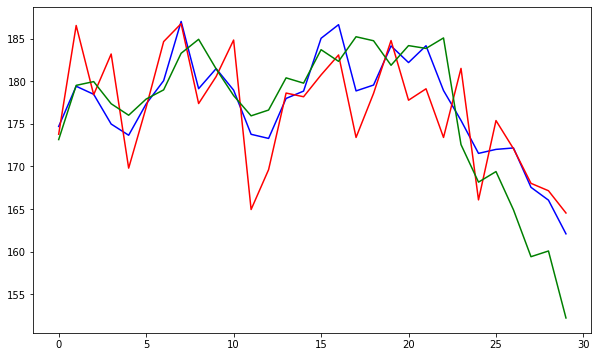

In [0]:
plt.figure(figsize=(10,6))
#plt.scatter(X_forecast,y_forecast,color='red')
plt.plot(prediction_SVR,color='blue')
plt.plot(prediction_RF,color='red')
plt.plot(actual,color='green')

In [0]:
# Here is Last 30 Dataset Visualization which we predicted
''' 
Here Green color is actual price of closing share
Here Red color is Predicted price of closing share using Supoort Vector Regression
Here Blue color is Predicted price of closing share using random forest Regression 

'''
